### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [16]:
data = pd.read_csv('data/coupons.csv')

In [17]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [40]:
data[data['Y'].isnull()]

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y


3. Decide what to do about your missing data -- drop, replace, other...

In [ ]:
# for now, I am not planning to drop any rows

4. What proportion of the total observations chose to accept the coupon?



In [31]:
data.groupby("Y")['Y'].count()

# There are 5474 (43.16%) people who did not accept the Coupon, and 7210 (56.84%) who did. 
# There are a total of 12684 people in this experiment


Y
0    5474
1    7210
Name: Y, dtype: int64

5. Use a bar plot to visualize the `coupon` column.

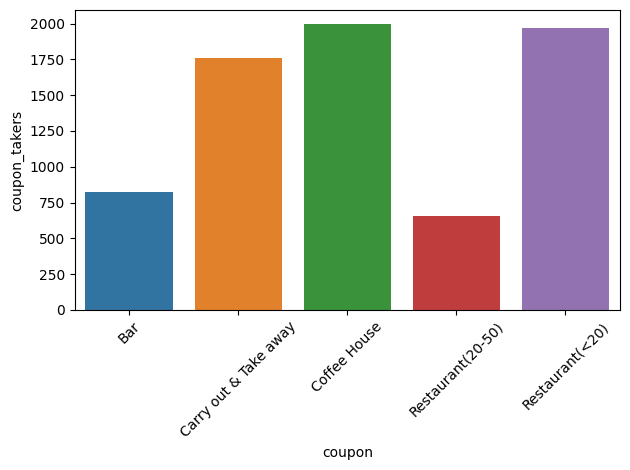

In [54]:
# see main.ipynb for more information

6. Use a histogram to visualize the temperature column.

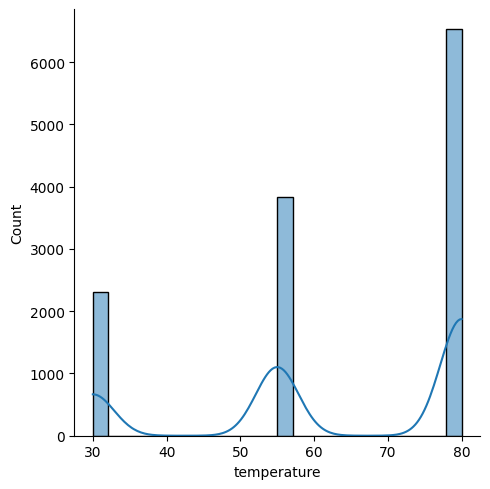

In [14]:
#sns.displot( data=df["sepal_length"], kde=True )

sns.displot( data=data["temperature"], kde=True )

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [22]:

#This dataframe contains people who were given bar coupons only
coupon_only = data[data["coupon"]=='Bar']
coupon_only = coupon_only.assign(Coupon_count=1)

# Renaming Y to Coupon Taker to make it more readable
coupon_only = coupon_only.rename(columns={'Y': 'Coupon_taker'})
coupon_only

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Coupon_taker,Coupon_count
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,1,0,0,1,0,1
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,0,0,1,0,1,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,1,1,0,1,0,1
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,1~3,4~8,1~3,1,1,0,0,1,0,1
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,1~3,4~8,1~3,1,1,0,0,1,0,1
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,1~3,4~8,1~3,1,1,0,0,1,0,1
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,1~3,4~8,1~3,1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [26]:
co2 = coupon_only.agg({'Coupon_taker':'sum','Coupon_count':sum})
co2

# 1190 (59%) did not use a coupon
# 827 (41%) used a coupon

Coupon_taker     827
Coupon_count    2017
dtype: int64

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [106]:
co3 = coupon_only.groupby(['Bar']).agg({'Coupon_taker':'sum','Coupon_count':sum})

co3.eval('Acceptance_Rate = (Coupon_taker / Coupon_count) ', inplace=True)
co3.sort_values(by=['Acceptance_Rate'], ascending=False)

# Those who go to bars have a 65% acceptance rate compared to those who go more.  
# Those who go more has a 78% (4~8) and 73% (gt8) acceptance rate

,Coupon_taker,Coupon_count,Acceptance_Rate
Bar,,,
4~8,117,150,0.780000
gt8,36,49,0.734694
1~3,257,397,0.647355
less1,253,570,0.443860
never,156,830,0.187952


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [107]:

co4_25andUp =  coupon_only[(coupon_only["age"]=='26') | (coupon_only["age"]=='46') | (coupon_only["age"]=='41')| (coupon_only["age"]=='31')| (coupon_only["age"]=='36')| (coupon_only["age"]=='50plus')]
co4_25Below =  coupon_only[(coupon_only["age"]=='below21') | (coupon_only["age"]=='21')]

c04_a1 = co4_25andUp.groupby(['Bar','age']).agg({'Coupon_taker':'sum','Coupon_count':sum})
c04_a2 = co4_25Below.groupby(['Bar','age']).agg({'Coupon_taker':'sum','Coupon_count':sum})

c04_a1.eval('Acceptance_Rate = (Coupon_taker / Coupon_count) ', inplace=True)
#c04_a1.sort_values(by=['Acceptance_Rate'], ascending=False)

c04_a2.eval('Acceptance_Rate = (Coupon_taker / Coupon_count) ', inplace=True)
#

# Those who go to bars have a 65% acceptance rate compared to those who go more.  
# Those who go more has a 78% (4~8) and 73% (gt8) acceptance rate

In [108]:
#Those who go to bars who are 25 and up
c04_a1.sort_values(by=['Acceptance_Rate'], ascending=False)

Coupon_taker  Coupon_count  Acceptance_Rate
Bar   age                                                
gt8   50plus             3             3         1.000000
4~8   31                14            16         0.875000
      46                 6             7         0.857143
      26                47            55         0.854545
gt8   26                15            18         0.833333
4~8   41                 3             4         0.750000
1~3   26                69            96         0.718750
      46                 6             9         0.666667
4~8   50plus             8            12         0.666667
1~3   50plus            34            52         0.653846
      31                46            71         0.647887
      41                18            28         0.642857
less1 41                46            88         0.522727
4~8   36                 6            12         0.500000
1~3   36                14            28         0.500000
less1 46                16            32         0.500000
      26                37            83         0.445783
      50plus            22            54         0.407407
gt8   31                 3             9         0.333333
less1 31                38           114         0.333333
      36                24            79         0.303797
never 36                17            87         0.195402
      31                24           124         0.193548
      46                10            61         0.163934
      26                22           140         0.157143
      41                 8            51         0.156863
      50plus            16           160         0.100000

In [109]:
#Those who go to bars below 25
c04_a2.sort_values(by=['Acceptance_Rate'], ascending=False)

,,Coupon_taker,Coupon_count,Acceptance_Rate
Bar,age,,,
gt8,21,13,15,0.866667
4~8,21,33,44,0.750000
1~3,21,68,107,0.635514
less1,21,64,108,0.592593
gt8,below21,2,4,0.500000
less1,below21,6,12,0.500000
never,below21,26,65,0.400000
1~3,below21,2,6,0.333333
never,21,33,142,0.232394


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [110]:
co5 = coupon_only[(coupon_only["Bar"]=='4~8') | (coupon_only["Bar"]=='1~3')| (coupon_only["Bar"]=='gt8')]

# set where passengers <> kids and occupations <> farming, fishing, forestry
co5_set1 = co5[(co5["passanger"]!='Kid(s)') & (co5["occupation"]!='Farming Fishing & Forestry')]

# all else
co5_set2 = co5[(co5["passanger"]=='Kid(s)') | (co5["occupation"]=='Farming Fishing & Forestry')]


In [112]:
# Acceptance rate of drivers who go once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry
# Answer is 71.3%

co5_set1 = co5_set1.groupby(['coupon']).agg({'Coupon_taker':'sum','Coupon_count':sum})
co5_set1.eval('Acceptance_Rate = (Coupon_taker / Coupon_count) ', inplace=True)
co5_set1

,Coupon_taker,Coupon_count,Acceptance_Rate
coupon,,,
Bar,393,551,0.713249


In [113]:
# All else
# Answer is 37.78%

co5_set2 = co5_set2.groupby(['coupon']).agg({'Coupon_taker':'sum','Coupon_count':sum})
co5_set2.eval('Acceptance_Rate = (Coupon_taker / Coupon_count) ', inplace=True)
co5_set2

,Coupon_taker,Coupon_count,Acceptance_Rate
coupon,,,
Bar,17,45,0.377778


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [122]:
# c06 - those who go to bars once a month
co6 = coupon_only[(coupon_only["Bar"]=='4~8') | (coupon_only["Bar"]=='1~3')| (coupon_only["Bar"]=='gt8')]

# (set A) go to bars more than once a month, had passengers that were not a kid, and were not widowed 
co6_setA = co6[(co6["passanger"]!='Kid(s)') & (co6["maritalStatus"]!='Widowed')]

# (set B) go to bars more than once a month and are under the age of 30
co6_setB = co6[(co6["age"]=='below21')| (co6["age"]=='21')|(co6["age"]=='26')]

# (set C) go to cheap restaurants more than 4 times a month and income is less than 50K
co6_setC= coupon_only[(coupon_only["RestaurantLessThan20"]=='gt8') & ((coupon_only["income"]=='Less than $12500') | (coupon_only["income"]=='$12500 - $24999')| (coupon_only["income"]=='$25000 - $37499')| (coupon_only["income"]=='$37500 - $49999'))]

# Calculate Acceptance Rate

# Set A
co6_setA = co6_setA.groupby(['coupon']).agg({'Coupon_taker':'sum','Coupon_count':sum})
co6_setA.eval('Acceptance_Rate = (Coupon_taker / Coupon_count) ', inplace=True)


# Set B
co6_setB = co6_setB.groupby(['coupon']).agg({'Coupon_taker':'sum','Coupon_count':sum})
co6_setB.eval('Acceptance_Rate = (Coupon_taker / Coupon_count) ', inplace=True)


# Set C
co6_setC = co6_setC.groupby(['coupon']).agg({'Coupon_taker':'sum','Coupon_count':sum})
co6_setC.eval('Acceptance_Rate = (Coupon_taker / Coupon_count) ', inplace=True)


In [124]:
print('(set A) go to bars more than once a month, had passengers that were not a kid, and were not widowed')
co6_setA

(set A) go to bars more than once a month, had passengers that were not a kid, and were not widowed


,Coupon_taker,Coupon_count,Acceptance_Rate
coupon,,,
Bar,393,551,0.713249


In [125]:
print('(set B) go to bars more than once a month and are under the age of 30')
co6_setB

(set B) go to bars more than once a month and are under the age of 30


,Coupon_taker,Coupon_count,Acceptance_Rate
coupon,,,
Bar,249,345,0.721739


In [123]:
print('(set C) go to cheap restaurants more than 4 times a month and income is less than 50K')
co6_setC

(set C) go to cheap restaurants more than 4 times a month and income is less than 50K


,Coupon_taker,Coupon_count,Acceptance_Rate
coupon,,,
Bar,57,96,0.59375


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [139]:
# Hypothesis-- Middle-income, young male have higher propensity to take bar coupons

co7 = coupon_only.groupby(['gender','income','age']).agg({'Coupon_taker':'sum','Coupon_count':sum})

co7.eval('Acceptance_Rate = (Coupon_taker / Coupon_count) ', inplace=True)
co7.sort_values(by=['Coupon_taker'], ascending=False)

Coupon_taker  Coupon_count  Acceptance_Rate
gender income           age                                                
Female Less than $12500 21                25            34         0.735294
       $25000 - $37499  26                25            39         0.641026
Male   $12500 - $24999  21                24            42         0.571429
       $37500 - $49999  26                23            35         0.657143
       $12500 - $24999  26                22            46         0.478261
...                                      ...           ...              ...
Female $37500 - $49999  36                 0             8         0.000000
Male   $62500 - $74999  36                 0             9         0.000000
       Less than $12500 36                 0             4         0.000000
Female $75000 - $87499  46                 0             3         0.000000
Male   Less than $12500 50plus             0             5         0.000000

[126 rows x 3 columns]

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [ ]:
# see main.ipynb for all my independent investigations